In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks
import pandas as pd
import sys
fpath = '/Users/LingxinW/Box/Wang/PythonStuff'
sys.path.append(fpath)
import heka_reader 

In [2]:
cd ~/Box/Wang/Ephys_recording/ALM_ephys/recordingfiles

C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys\recordingfiles


In [70]:
myfile = heka_reader.Bundle ('190725.dat') # pick one specific recording file

In [71]:
#mydata = myfile.data[1,10,5,0] # data from group 2, series 11, trace number 5
#mydata2 = myfile.data[1,10,5,1] # mechanical stimulation data 

#y = mydata*1000000000000 # change MRC from A to pA

g = 3 # group number
x = np.arange(len(myfile.data[g,10,5,0]))/5000
# extract data for stimulation
stim = []
for j in range (0,6):
    stim.append(myfile.data[g,10,j,1])
    
stim_swp = stim

# creat empty list of 1-6 sweeps and later put all three sweeps into this empty list
mrc_swps = []
sw1 = []
sw2 = []
sw3 = []
sw4 = []
sw5 = []
sw6 = []

# create a for loop to collect 1-6 sweeps in three series
 
for i in range (10,13):
    sw1.append(myfile.data[g,i,0,0]*1000000000000)
    sw2.append(myfile.data[g,i,1,0]*1000000000000)
    sw3.append(myfile.data[g,i,2,0]*1000000000000)
    sw4.append(myfile.data[g,i,3,0]*1000000000000)
    sw5.append(myfile.data[g,i,4,0]*1000000000000)
    sw6.append(myfile.data[g,i,5,0]*1000000000000)
   
# Now calculate the mean of three repeats by averaging the nested lists (lists in lists)
# here I just want to print to give one expample of the mean of three same sweeps, here sweep #1.
sw1_mean = (sw1[0]+sw1[1]+sw1[2])/3
sw2_mean = (sw2[0]+sw2[1]+sw2[2])/3
sw3_mean = (sw3[0]+sw3[1]+sw3[2])/3
sw4_mean = (sw4[0]+sw4[1]+sw4[2])/3
sw5_mean = (sw5[0]+sw5[1]+sw5[2])/3
sw6_mean = (sw6[0]+sw6[1]+sw6[2])/3

mrc_swps.append(sw1_mean)
mrc_swps.append(sw2_mean)
mrc_swps.append(sw3_mean)
mrc_swps.append(sw4_mean)
mrc_swps.append(sw5_mean)
mrc_swps.append(sw6_mean)
print (sw1_mean)

[-2.27344471 -1.81458431 -2.39858846 ... -1.73115515 -2.00229993
 -2.02315722]


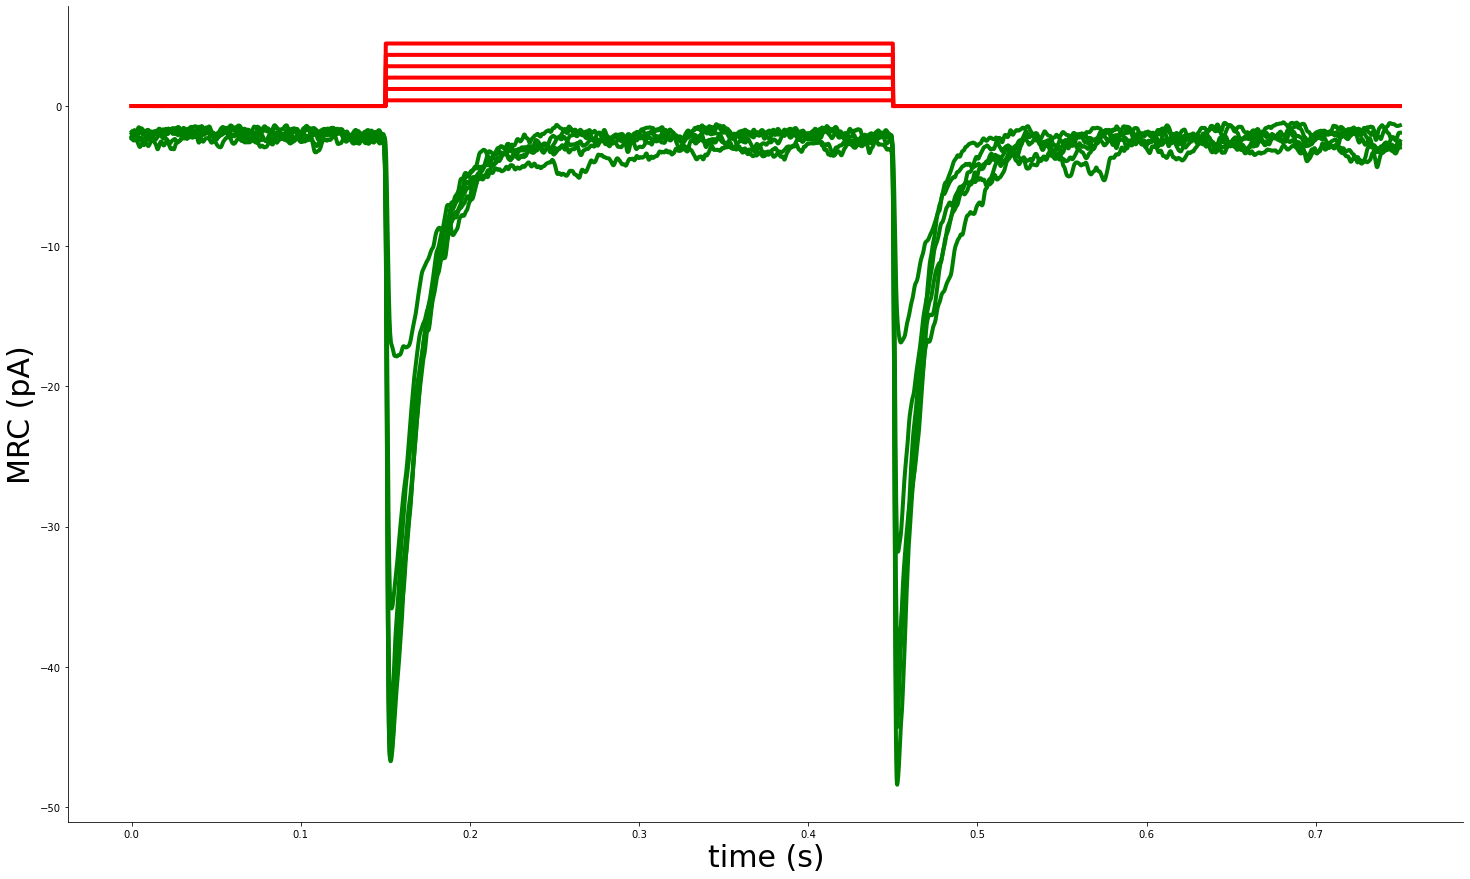

In [72]:
# here I am going to smooth the averaged sweeps one by one in a loop and plot them together



fig, ax = plt.subplots (figsize=(25,15)) # set figure size
ax.spines ['top'].set_visible (False)
ax.spines ['right'].set_visible (False)
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('MRC (pA)', fontsize = 30)


#plt.plot (x, y1, 'o', markersize = 8, color = 'b')
plt.plot (x, stim_swp[0], 'r-', lw=4)
plt.plot (x, stim_swp[1], 'r-', lw=4)
plt.plot (x, stim_swp[2], 'r-', lw=4)
plt.plot (x, stim_swp[3], 'r-', lw=4)
plt.plot (x, stim_swp[4], 'r-', lw=4)
plt.plot (x, stim_swp[5], 'r-', lw=4)

plt.plot (x, gaussian_filter (sw1_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw2_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw3_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw4_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw5_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw6_mean, 3), 'g-', lw=4)


In [73]:
t_peaks_on = []
amp_peaks_on = []
t_peaks_off = []
amp_peaks_off =[]

# it is very important to creat loops to fill the ampty lists
# do not forget to smooth the mean traces using gaussian_filter function
for i in range (6):
    t_peaks_on.append(np.argmax(-gaussian_filter(mrc_swps[i][:1000],3))/5000)
    amp_peaks_on.append(gaussian_filter(mrc_swps[i],3)[np.argmax(-gaussian_filter(mrc_swps[i][:1000],3))])
    t_peaks_off.append((np.argmax(-gaussian_filter(mrc_swps[i][2000:3500],3))+2000)/5000)
    amp_peaks_off.append(gaussian_filter(mrc_swps[i],3)[np.argmax(-gaussian_filter(mrc_swps[i][2000:3500],3))+2000])
    #t_peaks_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    #amp_peaks_off.append(mrc_swps[i][np.argmax(-mrc_swps[i][2000:3500])+2000])

print(t_peaks_on)
print(amp_peaks_on)
                        
print(t_peaks_off)
print(amp_peaks_off)



[0.1568, 0.1536, 0.1532, 0.1528, 0.153, 0.153]
[-17.865827815837243, -35.84515804580968, -43.467035639057315, -45.02292405353256, -46.534430727124146, -46.74111237829453]
[0.4548, 0.453, 0.453, 0.4526, 0.4524, 0.4526]
[-16.870395182821493, -31.801305559545877, -39.08879412917854, -43.462379934861524, -44.3476684238012, -48.41972041507875]


In [74]:
# use the loops created from up section


t_start_act_on = []
t_start_act_off = []
#This for loop is to ...
for i in range (6):
    t_start_act_on.append(np.argmax(-np.diff(gaussian_filter(mrc_swps[i][:1000],3),2))/5000)
    
    t_start_act_off.append((np.argmax(-np.diff(gaussian_filter(mrc_swps[i][2200:3500],3),2))+2200)/5000)
   
    #t_start_act_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    


print (t_start_act_on)
print (t_start_act_off)

[0.1502, 0.1502, 0.15, 0.15, 0.15, 0.15]
[0.4502, 0.4502, 0.45, 0.45, 0.45, 0.45]


In [75]:
# Now calculate the half-time to maximum current 

t_half_act_on = [] # MRC_on current half-time to maximum current
t_half_act_off = [] # MRC_off current half-time to maximum current

# you cannot calculate list minus list directly
# calculation should only happen elements by elements
# here time point switch from second - s to milisecond - ms by dividing time with 1000
for i in range (6):
    t_half_act_on.append(((t_peaks_on [i] - t_start_act_on[i])/2)*1000)
    t_half_act_off.append(((t_peaks_off [i] - t_start_act_off[i])/2)*1000)
    
print (t_half_act_on)
print (t_half_act_off)

[3.299999999999997, 1.699999999999993, 1.600000000000004, 1.3999999999999986, 1.5000000000000013, 1.5000000000000013]
[2.2999999999999963, 1.4000000000000123, 1.5000000000000013, 1.2999999999999956, 1.2000000000000066, 1.2999999999999956]


In [76]:
# time point of peak amplitude of on and off MRC will be used here
# do not forget to smooth the veraged traces first
# argmax() functions will read the whole list and find the fist point the satisfy the condition, or it will read through 
# a list and give the indice of the maximum value of a list

t_half_decay_on = []
t_half_decay_off = []

for i in range (6):
     t_half_decay_on.append ((((np.argmax(gaussian_filter(mrc_swps[i][770:1100],3) > (amp_peaks_on[i]*0.5))+770)*(1/5000)) - t_peaks_on[i])*1000)
       
     t_half_decay_off.append((((np.argmax(gaussian_filter(mrc_swps[i][2300:3500],3) > (amp_peaks_off[i]*0.5))+2300)*(1/5000)) - t_peaks_off[i])*1000)
    
print (t_half_decay_on)
print (t_half_decay_off)

[23.60000000000001, 15.000000000000014, 13.800000000000006, 15.000000000000014, 15.200000000000019, 15.000000000000014]
[20.000000000000018, 14.400000000000023, 12.400000000000022, 13.800000000000034, 12.00000000000001, 11.400000000000022]


In [77]:
EphysData = {'amp_peaks_on': amp_peaks_on, 't_peaks_on':t_peaks_on, 'amp_peaks_off': amp_peaks_off, 't_peaks_off':t_peaks_off,\
            't_start_act_on': t_start_act_on, 't_start_act_off': t_start_act_off, 't_half_act_on': t_half_act_on,\
            't_half_act_off': t_half_act_off, 't_half_decay_on': t_half_decay_on, 't_half_decay_off': t_half_decay_off, 'group_number': g+1}
EphysDataFrame = pd.DataFrame(EphysData)

EphysDataFrame

,amp_peaks_on,t_peaks_on,amp_peaks_off,t_peaks_off,t_start_act_on,t_start_act_off,t_half_act_on,t_half_act_off,t_half_decay_on,t_half_decay_off,group_number
0,-17.865828,0.1568,-16.870395,0.4548,0.1502,0.4502,3.3,2.3,23.6,20.0,4
1,-35.845158,0.1536,-31.801306,0.4530,0.1502,0.4502,1.7,1.4,15.0,14.4,4
2,-43.467036,0.1532,-39.088794,0.4530,0.1500,0.4500,1.6,1.5,13.8,12.4,4
3,-45.022924,0.1528,-43.462380,0.4526,0.1500,0.4500,1.4,1.3,15.0,13.8,4
4,-46.534431,0.1530,-44.347668,0.4524,0.1500,0.4500,1.5,1.2,15.2,12.0,4
5,-46.741112,0.1530,-48.419720,0.4526,0.1500,0.4500,1.5,1.3,15.0,11.4,4


In [78]:
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys

wb = pd.ExcelWriter(dfpath +'190724.xlsx', engine='xlsxwriter')
EphysDataFrame.to_excel(wb, sheet_name='Analysis')

wb.save()

In [80]:
EphysDataFrame.iloc[0,0]

-9.531613108793943

In [81]:
EphysDataFrame.to_csv("ALM_Data.csv") # this will save the file directly to the filepath of the recording files